In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns

%matplotlib inline

### 參考資料
https://chenhh.gitbooks.io/multiperiod_portfolio_optimization/content/pymc/

<AxesSubplot:ylabel='Count'>

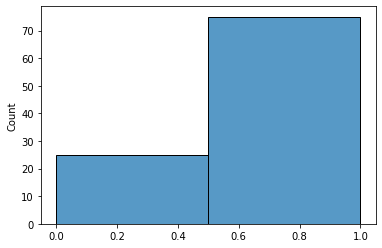

In [2]:
from scipy import stats
flips = stats.bernoulli.rvs(p=0.7,size=100)
sns.histplot(flips,bins=2)

In [3]:
with pm.Model() as model:
    p = pm.Uniform('p',0.1,0.9)
    obv = pm.Bernoulli('r',p,observed=flips)
    

In [4]:
with model:
    start = pm.find_MAP(vars=[p])
    step = pm.NUTS() 
    trace = pm.sample(2000, start=start, step=step)


/var/folders/d6/vj5hxm5x0t59r3z99j3tgkj00000gn/T/ipykernel_5199/1457939336.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.


/var/folders/d6/vj5hxm5x0t59r3z99j3tgkj00000gn/T/ipykernel_5199/4166390510.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace[burnin::thin], ['p'])
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

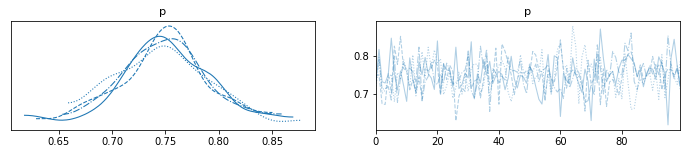

In [5]:
burnin = 1000
thin = 10
pm.traceplot(trace[burnin::thin], ['p'])